### Today:
* Logistic regression
    * Model
    * Cost function
    * Optimisation
    * Model selection
    * Evaluating classification models

### Resources:
* Logistic regression: https://mcerovic.github.io/notes/LogisticRegression/index.html
* Evaluating model http://mlwiki.org/index.php/Precision_and_Recall#F_Measure

# Logistic Regression

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.reset_default_graph()

In [2]:
# Load dataset as numpy array
data = np.loadtxt('../../data/03_LogisticRegression/lr_data.csv', delimiter=',')

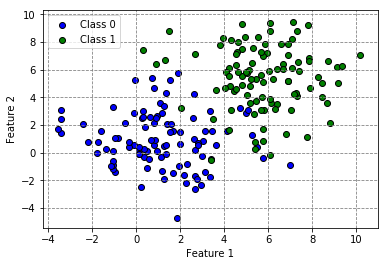

In [3]:
# Find index of samples with class 0
idx = data[:, 2] == 0.0

# Plot dataset
fig, ax = plt.subplots()
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.scatter(data[idx][:, 0], data[idx][:,1], c='b', edgecolors='k', label='Class 0')
ax.scatter(data[~idx][:,0], data[~idx][:,1], c='g', edgecolors='k', label='Class 1')
ax.grid(True, color='gray', linestyle='dashed')
ax.legend()

In [4]:
# Split dataset on features and labels
x_data = data[:, :2]
y_data = data[:, 2].reshape(len(data), 1)
print(x_data.shape, y_data.shape)

(200, 2) (200, 1)


In [5]:
# Define parameters
n_features = 2
n_samples = len(data)
learning_rate = 0.01
training_epochs = 10000

In [6]:
# Graph input
X = tf.placeholder(tf.float32, [None, n_features], "X")
y = tf.placeholder(tf.float32, [None, 1], "y")

# Model parameters
W = tf.Variable(tf.random_normal([n_features, 1]), name="W", trainable=True)
b = tf.Variable(tf.random_normal([1, 1]), name="b", trainable=True)

## Model

In [7]:
hypothesis = tf.sigmoid(tf.add(tf.matmul(X, W), b), name="hypothesis")

## Cost function

In [8]:
cost = tf.reduce_mean(-tf.multiply(y, tf.log(hypothesis)) - 
                      tf.multiply(tf.subtract(1.0, y), tf.log(tf.subtract(1.0, hypothesis))))

## Optimization

In [9]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Train and save the model

In [10]:
# Add ops to save and restore all the variables.
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        
        err, _ = sess.run([cost, train_op], {X: x_data, y: y_data})
        
        if epoch % 1000 == 0:
            print(epoch, err)

    W_computed, b_computed = sess.run([W, b])
    print(W_computed, b_computed)
    
    save_path = saver.save(sess, "./models/logistic_regression")
    print("Model saved in file: %s" % save_path)

0 4.4353204
1000 0.31923437
2000 0.24483828
3000 0.21229927
4000 0.19415009
5000 0.18259689
6000 0.17461468
7000 0.16878483
8000 0.1643531
9000 0.16088091
[[0.78995186]
 [0.6350891 ]] [[-4.5338655]]
Model saved in file: ./models/logistic_regression


In [11]:
parameters = [b_computed[0][0], W_computed[1][0], W_computed[0][0]]
parameters

[-4.5338655, 0.6350891, 0.78995186]

Pošto radim u dve dimenzije, možemo nacrtati jednačinu rešavanjem jedne vrednosti preko druge. Jednačina modela je $ x_{2}w_{2} + x_{1}w_{1} + w_{0} $ i rešavanjem po $x_{1}$ dobijamo da je vrednost za $$ x_{2} = \frac{-w_{0} - w_{1}x_{1}}{w_{2}} $$

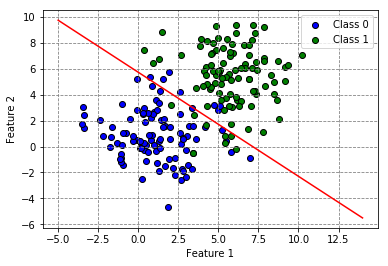

In [12]:
x = np.arange(-5, 15)
y = (-parameters[0] - parameters[1] * x) / parameters[2]
ax.plot(x, y, '-', color='r', marker=' ')
fig

## Load model

INFO:tensorflow:Restoring parameters from ./models/logistic_regression
Model restored.
[['0.649413' 'Class 2']
 ['0.22700529' 'Class 1']
 ['0.0010233037' 'Class 1']]


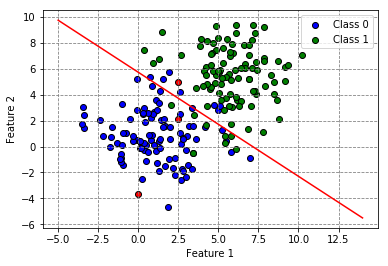

In [13]:
with tf.Session() as sess:
    
    model = tf.train.import_meta_graph('./models/logistic_regression.meta')
    model.restore(sess, tf.train.latest_checkpoint('./models/'))
    graph = tf.get_default_graph()
    print("Model restored.")
    
    # Predict label for samples
    predict_data = np.array([[2.5, 5.0], [2.5, 2.1], [0.0, -3.7]])
    
    # Predict probability for each sample
    predict_proba = sess.run("hypothesis:0", {"X:0": predict_data})
    
    # Find class of each sample
    predict_label = np.array([['Class 2'] if predict_proba[i] >= 0.5 else ['Class 1'] for i in range(len(predict_data))])
    
    # Print and preview results
    print(np.hstack([predict_proba, predict_label]))
    ax.scatter(predict_data[:, 0], predict_data[:, 1], c='r', edgecolors='k')
fig